# Amazon Reviews Data - Similar Items "Items you may like"


In [98]:
import pandas as pd

In [99]:
rating_elec = pd.read_csv('ratings_Electronics.csv',
                          header=None, 
                          names=['user_id','item_id','rating','epoch_timestamp']
                         ).sample(500000)

In [100]:
rating_elec.dtypes

user_id             object
item_id             object
rating             float64
epoch_timestamp      int64
dtype: object

In [29]:
rating_elec.head()

,user_id,item_id,rating,epoch_timestamp
2029984,A2MHF49M4O389A,B001G4QXLE,1.0,1291248000
2404404,A3NF1RKSXG8BIU,B00206WJ42,5.0,1354233600
2682804,AI0KP6358UVDB,B002LC62GG,4.0,1371513600
3355807,A2ROQTH356EURK,B003GGXGU6,4.0,1357776000
1821150,ASINFHYLAJYOS,B0019EHU8G,5.0,1358985600


In [30]:
rating_elec.describe()

,rating,epoch_timestamp
count,100000.000000,1.000000e+05
mean,4.008450,1.338102e+09
std,1.381882,6.906659e+07
min,1.000000,9.389088e+08
25%,3.000000,1.315440e+09
50%,5.000000,1.360886e+09
75%,5.000000,1.386029e+09
max,5.000000,1.406074e+09


In [31]:
#converting the epoch time to pandas datetime
import time
#time.time(rating_elec['Timestamp'])
def convertEpochTime(epochtime):
    return pd.to_datetime(time.strftime('%m/%d/%Y',  time.gmtime(epochtime)))
    #return pd.to_datetime(epochtime)

In [32]:
rating_elec['date_of_review'] = rating_elec.epoch_timestamp.map(convertEpochTime)
rating_elec.dtypes

user_id                    object
item_id                    object
rating                    float64
epoch_timestamp             int64
date_of_review     datetime64[ns]
dtype: object

In [33]:
#adding a column for day of the week; Monday=0, Sunday=6
rating_elec['day_of_review'] = rating_elec.date_of_review.dt.dayofweek

In [34]:
#adding a column for day of the week; Monday=0, Sunday=6
rating_elec['month_of_review'] = rating_elec.date_of_review.dt.month

In [43]:
rating_elec.head(10)

,user_id,item_id,rating,epoch_timestamp,date_of_review,day_of_review,month_of_review,intRating
2029984,A2MHF49M4O389A,B001G4QXLE,1.0,1291248000,2010-12-02,3,12,1
2404404,A3NF1RKSXG8BIU,B00206WJ42,5.0,1354233600,2012-11-30,4,11,5
2682804,AI0KP6358UVDB,B002LC62GG,4.0,1371513600,2013-06-18,1,6,4
3355807,A2ROQTH356EURK,B003GGXGU6,4.0,1357776000,2013-01-10,3,1,4
1821150,ASINFHYLAJYOS,B0019EHU8G,5.0,1358985600,2013-01-24,3,1,5
2237733,A1SWYW9E3UO1VQ,B001QGE7TW,5.0,1294185600,2011-01-05,2,1,5
3980560,A3IGXJH3VM5L84,B004AB35NY,5.0,1395187200,2014-03-19,2,3,5
6975956,A322RWKNTNX61K,B00AXE6CWS,5.0,1364515200,2013-03-29,4,3,5
4326524,A2YX5C7ZAW1MR7,B004OT7JMA,5.0,1378944000,2013-09-12,3,9,5
1856503,A1NZOTJH8IUGEA,B001AO4MWW,4.0,1224288000,2008-10-18,5,10,4


In [35]:
rating_elec.dtypes

user_id                    object
item_id                    object
rating                    float64
epoch_timestamp             int64
date_of_review     datetime64[ns]
day_of_review               int64
month_of_review             int64
dtype: object

In [36]:
rating_elec.rating.value_counts()

5.0    55370
4.0    19078
1.0    11562
3.0     8141
2.0     5849
Name: rating, dtype: int64

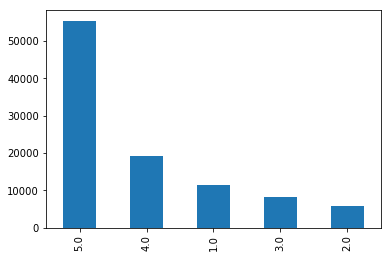

In [58]:
import matplotlib
%matplotlib inline
rating_elec.rating.value_counts().plot.bar()

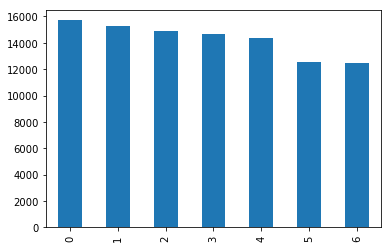

In [38]:
%matplotlib inline
#rating_elec.plot.scatter('rating','day_of_review')
rating_elec.day_of_review.value_counts().plot.bar()

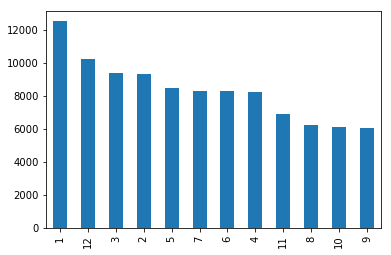

In [39]:
%matplotlib inline
#rating_elec.plot.scatter('rating','day_of_review')
rating_elec.month_of_review.value_counts().plot.bar()

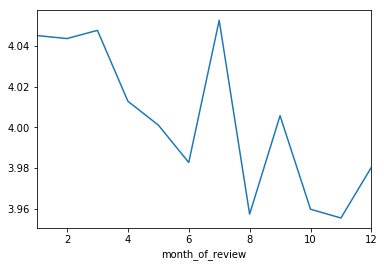

In [40]:
rating_elec.groupby('month_of_review')['rating'].mean().plot()
# the graph is quite dramatic but if you see the difference in ratings, it's negligible

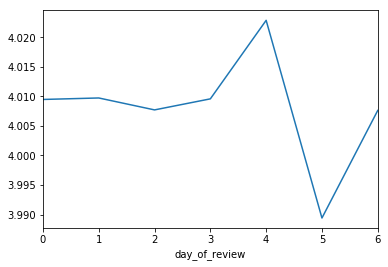

In [41]:
rating_elec.groupby('day_of_review')['rating'].mean().plot()
# the graph is quite dramatic but if you see the difference in ratings, it's negligible

In [42]:
def convert_to_int(rating):
    return int(rating)

rating_elec['intRating'] = rating_elec.rating.map(convert_to_int)

In [49]:
import sklearn.cross_validation
(trainX, testX, trainY, testY) = sklearn.cross_validation.train_test_split(
    rating_elec[['day_of_review', 'month_of_review']], rating_elec.rating
)

In [50]:
import sklearn.linear_model

In [51]:
regressor = sklearn.linear_model.TheilSenRegressor()

In [52]:
X = trainX
y = trainY

In [53]:
regressor.fit(X,y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [54]:
regressor.coef_

array([-0.01490989, -0.01716113])

In [55]:
regressor.predict([ [5,4]])

array([ 4.61188146])

In [56]:
pred = regressor.predict(testX)

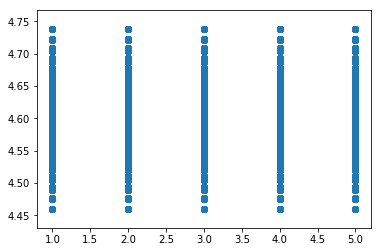

In [60]:
matplotlib.pyplot.scatter(testY, pred)
# can't predict ratings, can I classify!? I guess no, because the ratings are quite uniformly distributed

In [70]:
rating_elec['like_or_hate'] = (rating_elec['rating'] > 3).map(convert_to_int)
rating_elec

,user_id,item_id,rating,epoch_timestamp,date_of_review,day_of_review,month_of_review,intRating,like_or_hate
2029984,A2MHF49M4O389A,B001G4QXLE,1.0,1291248000,2010-12-02,3,12,1,0
2404404,A3NF1RKSXG8BIU,B00206WJ42,5.0,1354233600,2012-11-30,4,11,5,1
2682804,AI0KP6358UVDB,B002LC62GG,4.0,1371513600,2013-06-18,1,6,4,1
3355807,A2ROQTH356EURK,B003GGXGU6,4.0,1357776000,2013-01-10,3,1,4,1
1821150,ASINFHYLAJYOS,B0019EHU8G,5.0,1358985600,2013-01-24,3,1,5,1
2237733,A1SWYW9E3UO1VQ,B001QGE7TW,5.0,1294185600,2011-01-05,2,1,5,1
3980560,A3IGXJH3VM5L84,B004AB35NY,5.0,1395187200,2014-03-19,2,3,5,1
6975956,A322RWKNTNX61K,B00AXE6CWS,5.0,1364515200,2013-03-29,4,3,5,1
4326524,A2YX5C7ZAW1MR7,B004OT7JMA,5.0,1378944000,2013-09-12,3,9,5,1
1856503,A1NZOTJH8IUGEA,B001AO4MWW,4.0,1224288000,2008-10-18,5,10,4,1


In [80]:
clf = sklearn.linear_model.LogisticRegression(C=1000000)

In [82]:
(trainX, testX, trainY, testY) = sklearn.cross_validation.train_test_split(
    rating_elec[['day_of_review', 'month_of_review']], rating_elec.like_or_hate
)

In [83]:
clf.fit(trainX, trainY)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [84]:
preds = clf.predict(testX)

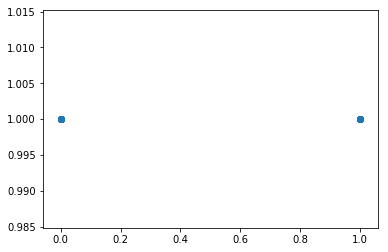

In [92]:
matplotlib.pyplot.scatter(testY, preds)

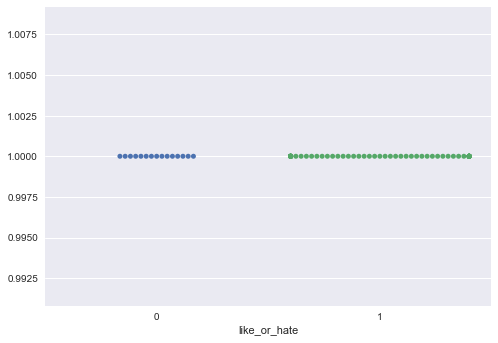

In [96]:
seaborn.swarmplot(x=testY, y=preds)

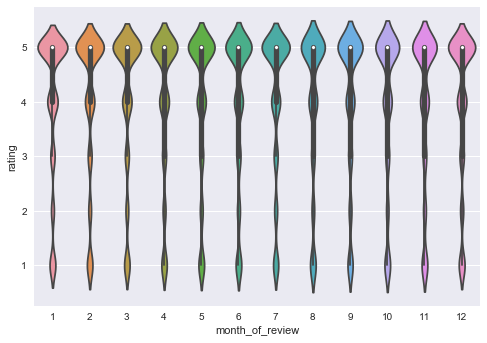

In [93]:
import seaborn
seaborn.violinplot(x='month_of_review', y='rating', data=rating_elec)

In [ ]:
#group by user_id to get mean/count of reviews
#group by item_id to get mean/count of reviews

#is Sunday a good day to review

#interesting facts about users - 

In [97]:
#count of reviews per user
rating_elec[['user_id','rating']].groupby(['user_id'])['rating'].count().sort_values(ascending=False)

user_id
ADLVFFE4VBT8             11
A3OXHLG6DIBRW8            7
A6FIAB28IS79              7
A3LGT6UZL99IW1            7
A1EH2S92FHWZRP            7
A4WEZJOIZIV4U             6
A1XCCTKNN1RZMZ            6
A1ODOGXEYECQQ8            6
A2NOW4U7W3F7RI            6
A31N0XY2UTB25C            6
A680RUE1FDO8B             6
A32O5FZH994CNY            5
APEOS7GWN31A4             5
A1JUBRIZMO0RJV            5
A23ZNGL704AW7O            5
A25QJBK33C4O0R            5
A3MFORLOKIOEQY            5
A2RIL2NXHE00AQ            5
A15QYHQH80W30L            5
A22CW0ZHY3NJH8            5
A1F7YU6O5RU432            5
A2NSXY5L42ZUGO            5
A2TUXUOKJHAYCI            5
A5JLAU2ARJ0BO             5
A2YT5IO3DKN3AN            4
AO377Z7UORPJ6             4
A2227NOW3899R7            4
A3IY316DRNF5F2            4
A11I1I9QLMAM1A            4
A2NLI1M5K2MQ5E            4
                         ..
A3I6KBN87H8GCO            1
A3I6KP8I5Z3HQL            1
A3I6MFJLS1JN82            1
A3I6NUEODSIJ84            1
A3I6OLR31QW3

In [133]:
#mean of reviews per user
rating_elec[['user_id','rating']].groupby(['user_id'])['rating'].mean().sort_values(ascending=False)

user_id
A2W1UJB2N45MZU    5.0
A3F5OCZ3ZHLOC8    5.0
A3F5Q9NAZP6SWR    5.0
A3F5Q96P2NRGK9    5.0
A3F5Q3SLPMJY8D    5.0
A2550NL2ZE2KVW    5.0
A3F5PXTBEDD3PZ    5.0
A2550XGZEFDH2Y    5.0
A3F5PT2XM3GFGY    5.0
A2550YNN373FLR    5.0
A3F5PCYG5PWC6X    5.0
A3F5OUNIHE1DOB    5.0
A255497ZXPLG4E    5.0
A3F5OI1U5F2F50    5.0
A2554DL7XWRQ04    5.0
A2557LEPAYMVX7    5.0
A2554MYRH756BM    5.0
A3F5NABZXJMGY     5.0
A25557YJHXL8P4    5.0
A2555G3OX3JHRF    5.0
A2555LMBGHZNGS    5.0
A3F5MU0XHIWPL0    5.0
A3F5MOZRIFK3XL    5.0
A3F5MDSSKIWS2O    5.0
A2555ZPSUFRDEJ    5.0
A3F5M82AVW9XSF    5.0
A3F5LRO29MG6YU    5.0
A3F5KZX98CM06T    5.0
A3F5QJPFOAZ3IM    5.0
A254ZYBR7A1UD9    5.0
                 ... 
A9P0IBS598RNT     1.0
A2GSRZM8TFTKMY    1.0
A31AH5RXE47HAH    1.0
A1LXVVR2G5XLKM    1.0
A31AH7RPW17NI5    1.0
A9OY3CTID2L78     1.0
A9OUFTPC2LTVO     1.0
A1LY0UOR4ODL72    1.0
A1LY4BFX9NK379    1.0
A1LY5WYS5DDKAH    1.0
A31AM2DE18IHYA    1.0
A9PB2OHLNPU9E     1.0
A1LXO7NAS3WRVS    1.0
A31AEV2W5VSNPI    1.0
A1

In [134]:
#count of reviews per item
rating_elec[['item_id','rating']].groupby(['item_id'])['rating'].count().sort_values(ascending=False)

item_id
B0074BW614    1136
B00DR0PDNE    1034
B007WTAJTO     839
B0019EHU8G     801
B006GWO5WK     760
B003ELYQGG     733
B003ES5ZUU     678
B00622AG6S     615
B007R5YDYA     613
B003LR7ME6     602
B0002L5R78     600
B000LRMS66     570
B009SYZ8OC     552
B008OHNZI0     530
B00BGA9WK2     510
B00BGGDVOO     464
B004QK7HI8     451
B009A5204K     447
B002MAPRYU     432
B0098F5W0Q     430
B002WE6D44     423
B005HMKKH4     397
B00316263Y     355
B0012S4APK     354
B0044YU60M     343
B0052YFYFK     336
B0001FTVEK     334
B0027VT6V4     329
B000I68BD4     326
B005DOK8NW     306
              ... 
B00535OBRK       1
B00535QHQ8       1
B00535TL0M       1
B005362A40       1
B00538AHNO       1
B00538ISI0       1
B00531E0ES       1
B00531DXEG       1
B0052WGDE8       1
B005319840       1
B0052WHP72       1
B0052XQFJU       1
B0052XUJ56       1
B0052XZO1U       1
B0052YAKOA       1
B0052YD53I       1
B0052YEUT6       1
B0052YJ6BS       1
B0052YOD48       1
B0052YOVUY       1
B0052Z996E       1
B005

In [135]:
#mean of reviews per item
rating_elec[['item_id','rating']].groupby(['item_id'])['rating'].mean().sort_values(ascending=False)

item_id
BT008UKTMW    5.0
B004A88TUQ    5.0
B004AB3GJM    5.0
B004AAID7I    5.0
B004A9XB6W    5.0
B004A9PMGE    5.0
B004A9PBJW    5.0
B004A9KYKI    5.0
B004A9DHMK    5.0
B004A95EZS    5.0
B004A8ZQIY    5.0
B004A8UNSC    5.0
B004A8SSDE    5.0
B004A8SD6Q    5.0
B004A8QP84    5.0
B004A8AD6Y    5.0
B004A85SWI    5.0
B0049YGHYQ    5.0
B004A7Z1PS    5.0
B004A7FGP8    5.0
B004A6NWEQ    5.0
B004A4WDRK    5.0
B004A3TPEA    5.0
B004A2YS48    5.0
B004A2TU9Q    5.0
B004A2RKB6    5.0
B004A2BX2S    5.0
B004A25DN8    5.0
B004A23E48    5.0
B004A220R0    5.0
             ... 
B001602YJS    1.0
B004OSBX9Q    1.0
B00160NJSI    1.0
B004OQS2WY    1.0
B0015WNZD6    1.0
B004OWO1YQ    1.0
B00DFK622C    1.0
B00DEQTXO6    1.0
B0015MVWMW    1.0
B009ES7XA4    1.0
B004P1ITZ8    1.0
B00GX6FCSA    1.0
B0002V3TUK    1.0
B0002V3AV8    1.0
B008CL0L5S    1.0
B0015QPJ9A    1.0
B0015R3L1W    1.0
B0015R519M    1.0
B0015RZF0C    1.0
B004P02IEM    1.0
B004OZR3G6    1.0
B0015UH0X4    1.0
B0015UM38G    1.0
B004OZIC7U    1.0
B0

In [137]:
rating_elec

,user_id,item_id,rating,epoch_timestamp
6074052,A1EDRJ8W6I868F,B0085DZRDE,5.0,1349049600
83531,A3AZ5LDRPW19VM,B000053HC5,5.0,1374624000
788270,A34CD7J49D0LA3,B000BY42TA,3.0,1393804800
3835873,A20H1M28WLI9J2,B0043AV8ZE,5.0,1333152000
6570607,A3CE14S3ZGG3L3,B009AOCNXY,5.0,1371859200
3270563,A10EZEZAUQQYHM,B003DZ166Q,5.0,1298678400
1578607,A1VUTCVK5IY0ZK,B0011TS8LM,5.0,1325030400
6909147,A34NJFPFLH72XN,B00AJHDZSI,4.0,1368576000
7150656,AAQSKY8XNTTJV,B00BQ4HRN2,5.0,1394841600
7236803,A2LXX47A0KMJVX,B00CBCUS1G,4.0,1377648000


In [ ]:
# if users are more or items are more
rating_elec.user_id.nunique()

In [ ]:
rating_elec.item_id.nunique()

In [101]:
# trying non-weighted graph first so taking the items which has good ratings (equivalent to bought and liked)
rating_elec_new = rating_elec[rating_elec.rating > 3]

In [102]:
# if users are more or items are more
rating_elec_new.user_id.nunique()

337990

In [103]:
rating_elec_new.item_id.nunique()

106001

In [116]:
#rating_elec.sort_values(['user_id','item_id'])
rating_elec_new.sort_values(['item_id'])

,user_id,item_id,rating,epoch_timestamp
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
19,A265MKAR2WEH3Y,0528881469,4.0,1294790400
65,A2MNKBHPMBB0EA,0594033926,5.0,1390003200
133,A1S6B5QFWGVL5U,0594481813,4.0,1372291200
148,A29FNXHYVA2W4G,0594511488,5.0,1398124800
158,A2E14J26DQZOAA,0777700018,5.0,1355529600
622,A1LSU3ES5R6WLN,0972683275,5.0,1380067200
620,A1VA1QF8KZNBLL,0972683275,5.0,1293580800
216,A1RGY08MHYC8AG,0972683275,4.0,1377907200
464,A1KECIKIWDB4HH,0972683275,4.0,1282867200


In [105]:
import networkx as nx
graph = nx.Graph()
nodes_already_added = set()
for index, row in rating_elec_new.iterrows():
    user = row['user_id']
    item = row['item_id']
    if user not in nodes_already_added:
        graph.add_node(user)
        nodes_already_added.add(user)
    if item not in nodes_already_added:
        graph.add_node(item)
        nodes_already_added.add(item)
    graph.add_edge(user, item)

In [106]:
import math
def amazon_weight(item):
    return math.sqrt(nx.degree(graph,item))

In [107]:
def amazon_cosine(item1,item2):
    return (len(list(nx.common_neighbors(graph,item1,item2)))) / amazon_weight(item1) / amazon_weight(item2)

In [108]:
# to pass one item and get n no. of most similar items
def most_similar_items_amazon(item,cnt_items):
    scores = [(amazon_cosine(item,other_item),other_item) 
              for other_item in rating_elec_new.item_id.unique() if  item != other_item ]
    scores.sort()
    scores.reverse()
    return scores[0:cnt_items]

In [109]:
# to pass one item and get n no. of most similar items
def most_similar_items_jaccard(item,cnt_items):
    similar_items = pd.DataFrame()
    for other_item in rating_elec_new.item_id.unique():
        if  item != other_item:
            jaccard_coef = nx.jaccard_coefficient(graph,[(item,other_item)])
            for u,v,p in jaccard_coef:
                similar_items = similar_items.append({
                        'Jaccard Coefficient':p,
                        'item1':u,
                        'item2':v
                    },ignore_index=True)
    similar_items.sort_values('Jaccard Coefficient',ascending=False,inplace='True')
    return similar_items[0:cnt_items]

In [ ]:
print most_similar_items_amazon('B00KJJW36G',4)
print most_similar_items_jaccard('B00KJJW36G',4)

In [110]:
#similar_items = pd.DataFrame(columns=['Amazon Cosine','Item1','Item2'])
similar_items = pd.DataFrame()
similar_items

""


In [111]:
for item1 in rating_elec_new.item_id.unique():
    for item2 in rating_elec_new.item_id.unique():
        if item1 != item2 and len(list(nx.common_neighbors(graph,item1,item2))) > 0:
            similar_items = similar_items.append({
                'Amazon Cosine':amazon_cosine(item1, item2),
                'Item1':item1,
                'Item2':item2
            },ignore_index=True)
similar_items

KeyboardInterrupt: 

In [131]:
rating_elec_new[rating_elec_new.user_id == 'A1LSU3ES5R6WLN']

,user_id,item_id,rating,epoch_timestamp
622,A1LSU3ES5R6WLN,0972683275,5.0,1380067200


In [129]:
def user_reommendations(person):

    # Gets recommendations for a person by using a weighted average of every other user's rankings
    totals = {}
    simSums = {}
    rankings_list =[]
    for other in rating_elec_new.user_id.unique():
        # don't compare me to myself
        if other == person:
            continue
        cosine = amazon_cosine(person,other)
        if cosine > 0:
            print other, cosine
            
    # ignore scores of zero or lower
        if cosine <= 0: 
            continue
        for item in rating_elec_new[rating_elec_new.user_id == other].item_id.unique():
            # only score movies i haven't seen yet
            if item not in rating_elec_new[rating_elec_new.user_id == person].item_id.unique():

                # Similrity * score
                totals.setdefault(item,0)                
                totals[item] += rating_elec_new[(rating_elec_new.item_id == item) & (rating_elec_new.user_id == other)].rating.values * cosine
                # sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+= cosine

    # Create the normalized list

    rankings = [(total/simSums[item],item) for item,total in totals.items()]
    rankings.sort()
    rankings.reverse()
    # returns the recommended items
    recommendataions_list = [recommend_item for score,recommend_item in rankings[0:4]]
    return recommendataions_list

In [130]:
print user_reommendations('A1LSU3ES5R6WLN')

A1GLL5CJ1SFAMS 1.0
AXBF39GC4I2EC 1.0
A1SIV0P0QLCP3X 0.707106781187
A2T4OX8NH9LIIC 0.5
A181ZV0355JPY6 1.0
ATNJBDID1K17N 1.0
A3DH6A4TTKGTPW 1.0
A3D9JOLPWI3SSL 1.0
AHWVTOXGM4SZ9 1.0
A2JRYRYTHLE4AB 1.0
A2ACJSHEC2RZVZ 1.0
A9MZROA9WNRJT 1.0
AANEB3ICACKM0 1.0
AV2AZD7ZIBC3L 1.0
A2BN7KPERT09N3 1.0
A1KECIKIWDB4HH 1.0
A1L5LHGAUIIEOU 1.0
A9UFBRZV2I3U1 1.0
A2QXA14SNZTF65 1.0
A1Y0Z0D0EP753W 1.0
A2ML1ZBZ75I058 1.0
AS2KRDSIWBM2P 1.0
A3F2F2UXWFGQSK 1.0
A5F4APY9E03PB 1.0
A111UHA2H22XE7 1.0
A6VR7MFCELNU6 1.0
A2PCG95PZLF92Q 1.0
A1PZ1UEVHMNS18 1.0
A35MCPGBZK8UY4 1.0
A1C4BMQQXOQD80 1.0
AXBCUEOWEL49V 0.707106781187
A1RKIVV5VR3RJ8 1.0
A108UXJTIV8XXY 1.0
A3EP4YIS9W1LR1 1.0
A371KJIZOECARJ 1.0
A2QAPBQOLC5MPM 1.0
A3NMAV0XRHOS1U 1.0
A3BLYMV1UIDWU9 1.0
A1JOEW6J1H9CXX 1.0
A3VSGMP5KCQ4Q2 1.0
A1YQJNKIMRBU1M 1.0
A2UMQGIOIQ2ZJ9 1.0
A1ELV5JOVFMNOV 1.0
A3586I23X68J59 1.0
A2DNXSCB3JXGY2 1.0
A1RGY08MHYC8AG 1.0
A1WHCQQ1016OC4 1.0
A3PRSCGIX3NY0X 1.0
ARG1JEPRCUDQT 1.0
A3P1AEV6KGPSYM 1.0
A1VVJLWQ15YTYV 1.0
AQBLWW13U66XD 1.0
A3O

In [ ]:
# What is the average clustering of the nodes in this graph?
# What is the average shortest path length?
nx.density(graph)

In [ ]:
nx.average_shortest_path_length(graph)

# my graph is not connected as not all the nodes are reachable from every other node

In [ ]:
nx.degree_centrality(graph)

In [ ]:
nx.betweenness_centrality(graph)

In [ ]:
similar_items

In [112]:
similar_items[similar_items['Amazon Cosine'] > 0].count()

Amazon Cosine    22060
Item1            22060
Item2            22060
dtype: int64

In [122]:
similar_items[(similar_items['Amazon Cosine'] < 1) & (similar_items['Amazon Cosine'] > 0)].count()

Amazon Cosine    22014
Item1            22014
Item2            22014
dtype: int64

In [132]:
similar_items.sort_values(['Item1'])

,Amazon Cosine,Item1,Item2
17965,0.125988,8862935293,B000EHYG9K
6786,0.500000,B00000J1FV,B003BMI4V6
1297,0.082479,B00000J1SC,B0034XDT0S
1298,0.109109,B00000J1SC,B00ARAHA5G
1299,0.119523,B00000J1SC,B00499Z25G
1301,0.154303,B00000J1SC,B00BS3NM3A
1300,0.113961,B00000J1SC,B007V9UO6S
1303,0.377964,B00000J1SC,B00HSCZYKY
1304,0.377964,B00000J1SC,B00AZ0TCI6
1302,0.377964,B00000J1SC,B00K2L3G5I


In [117]:
print amazon_cosine('A1LSU3ES5R6WLN','A1VA1QF8KZNBLL')

1.0


In [ ]:
print amazon_cosine

## Jaccard Coefficient

In [139]:
list(nx.jaccard_coefficient(graph,[('A1LSU3ES5R6WLN','A1VA1QF8KZNBLL')]))

[('A1LSU3ES5R6WLN', 'A1VA1QF8KZNBLL', 1.0)]